<a href="https://colab.research.google.com/github/sainirajesh17/Bank_Marketing_Effectiveness_Prediction-ML_Classification-/blob/main/Bank_Marketing_Effectiveness_Prediction_(Classification)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

# **Problem Statement**

### *The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y)*.


# **Data Gathering and Discovery**

*In this section we will import our dataset and do some basic operations to see what sort of data that we have and what all attributes are there along with the dependent variable*

# **Loading the dataset**

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# For data visualization

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
# Mounting drive to load data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset

file_path = '/content/drive/MyDrive/Bank Marketing Effectiveness Prediction (Classification)/bank-full.csv'

df = pd.read_csv(file_path, sep = ";")

# **Attributes and their Description**

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* age (numeric)
* job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* y - has the client subscribed a term deposit? (binary: 'yes','no')

# **Dataset Inspection**

In [ ]:
# Checking the first 5 rows of the dataset

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Checking the last 5 rows of the dataset

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
# List of columns of the dataset 

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Checking number of rows and columns in our dataset.

df.shape

(45211, 17)

In [ ]:
# Checking the Datatype of the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Checking duplicates.

df.duplicated().sum()

0

In [ ]:
# Checking the Statistical info 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
# Checking null values of data.

df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# **Exploratary Data Analysis**

**Splitting the data in numerical and categorical**

In [ ]:
# find categorical variables

categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O')]
print(f'There are {len(categorical_features)} categorical variables')
categorical_features

There are 10 categorical variables


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
# Checking the head of the categorical features

df[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
# find numerical variables

numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O' )]
print(f'There are {len(numerical_features)} numerical variables')
numerical_features

There are 7 numerical variables


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
# Checking the head of the numerical features

df[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


# **Univariate analysis of numerical features**

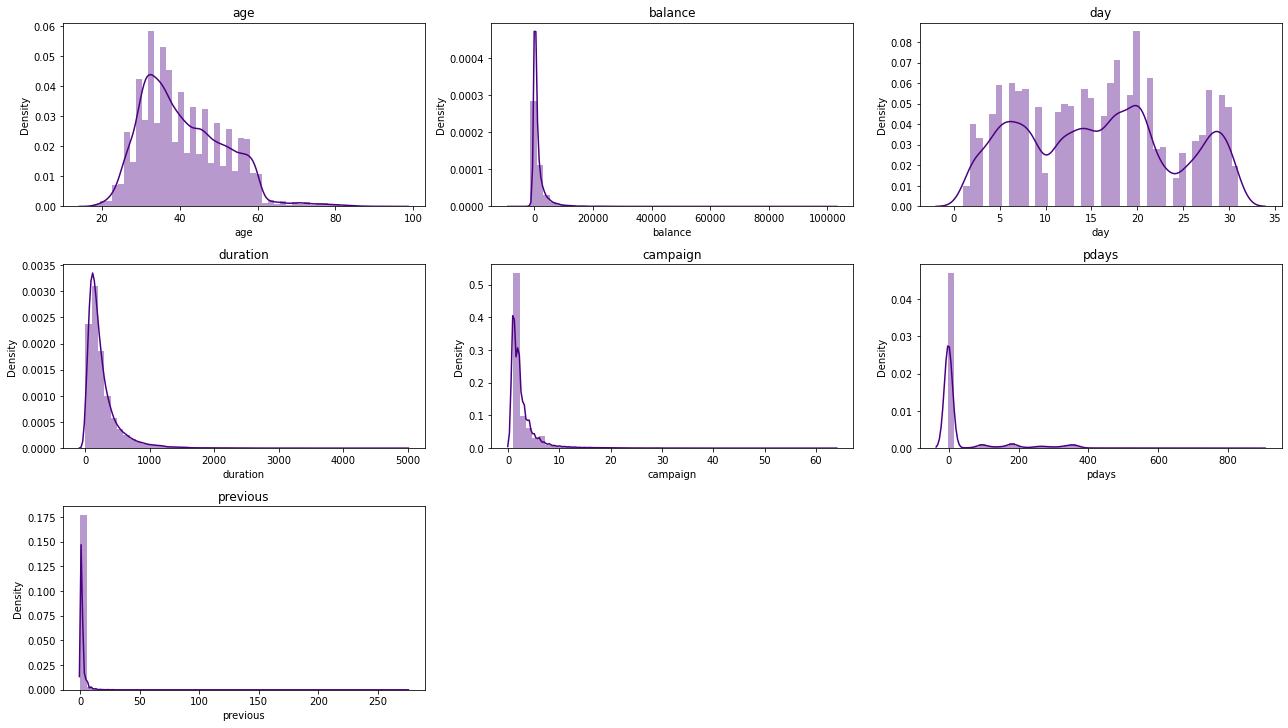

In [ ]:
# Distibution plot of Numerical features to check the skewness.

n=1
plt.figure(figsize=(18,40))
for i in numerical_features:
  plt.subplot(12,3,n)
  n= n+1
  sns.distplot(df[i],color='indigo')
  plt.title(i)
  plt.tight_layout()

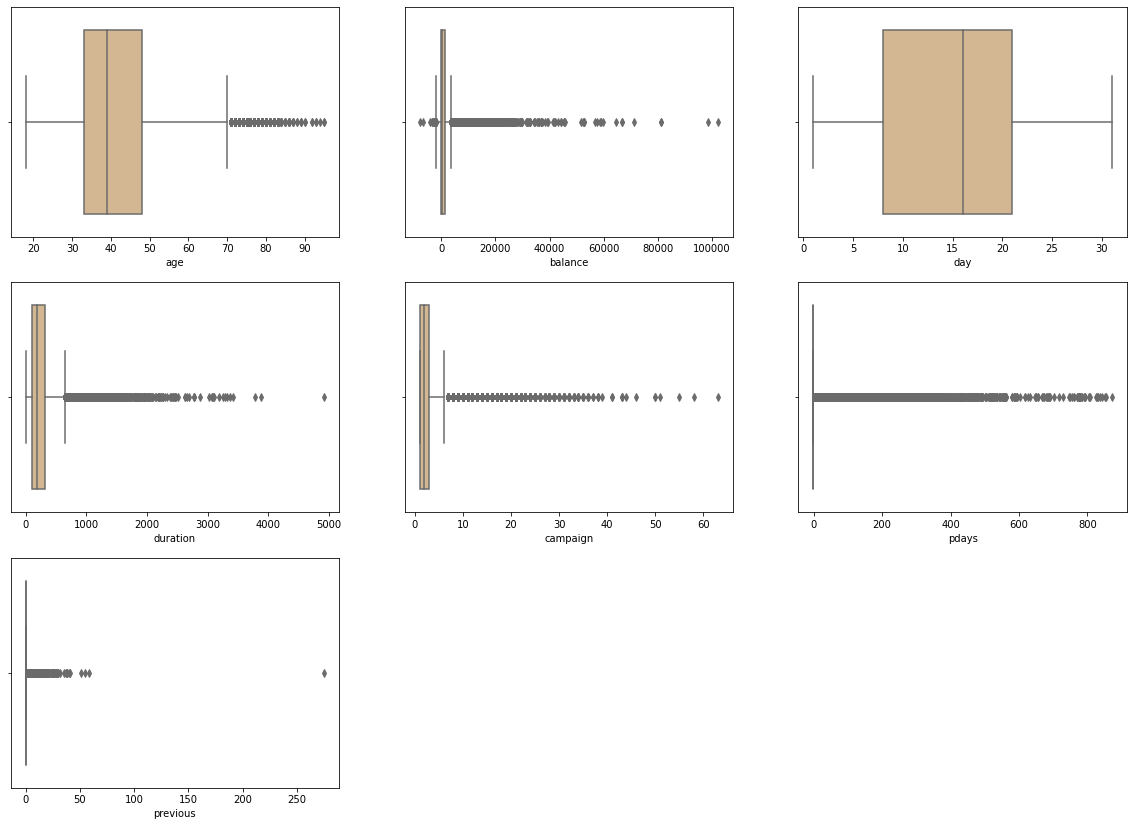

In [ ]:
# ploting a boxplot for each numerical feature to check the outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature], color='#DEB887')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

# **Checking Multicollinearity**

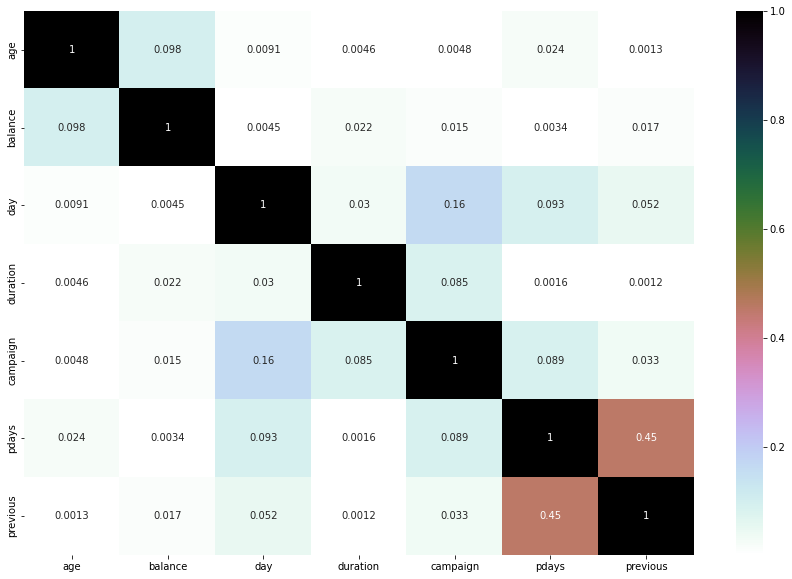

In [ ]:
# using correlation graph to check multicollinearity

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'cubehelix_r', annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Making function for VIF calculation.

def cal_VIF(F):
 
  
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [ ]:
# Checking the VIF score of all the independent variables.

cal_VIF(df[[i for i in df.describe().columns]])

,variables,VIF
0,age,5.004058
1,balance,1.212908
2,day,3.984268
3,duration,1.901309
4,campaign,1.824694
5,pdays,1.454202
6,previous,1.341641


# **Univariate analysis of categorical features**

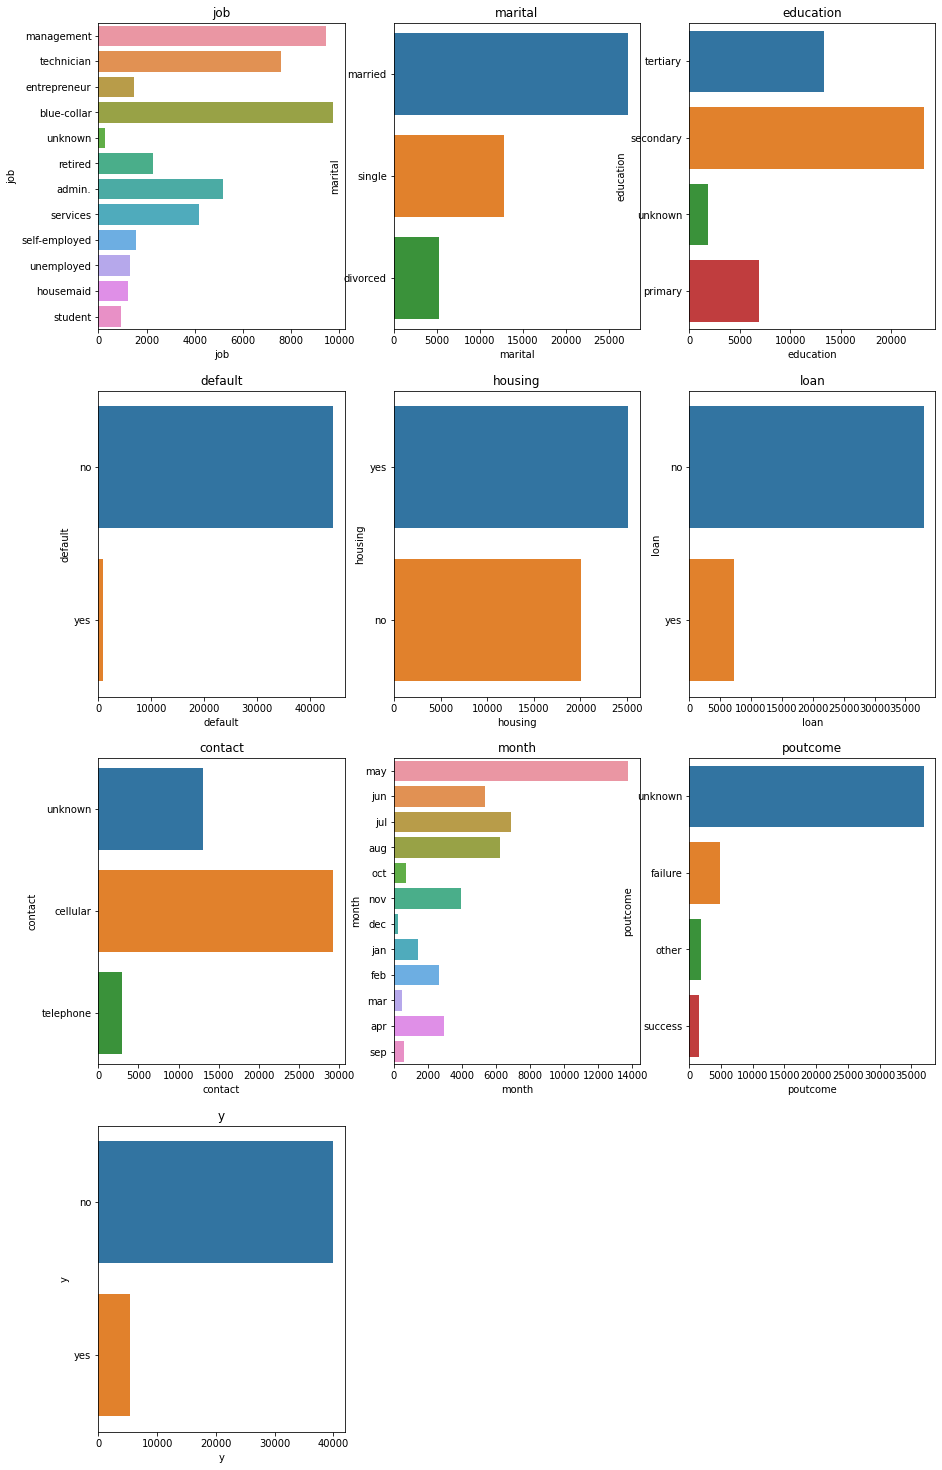

In [ ]:
# Checking categorical features distribution by ploting count plot.

plt.figure(figsize=(15,80))
plotnumber = 1
for categorical_feature in categorical_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.countplot(y = categorical_feature,data=df)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber += 1
plt.show()  

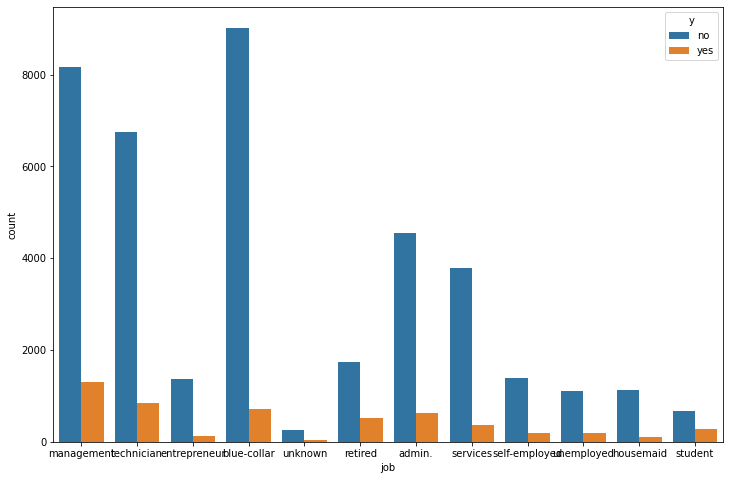

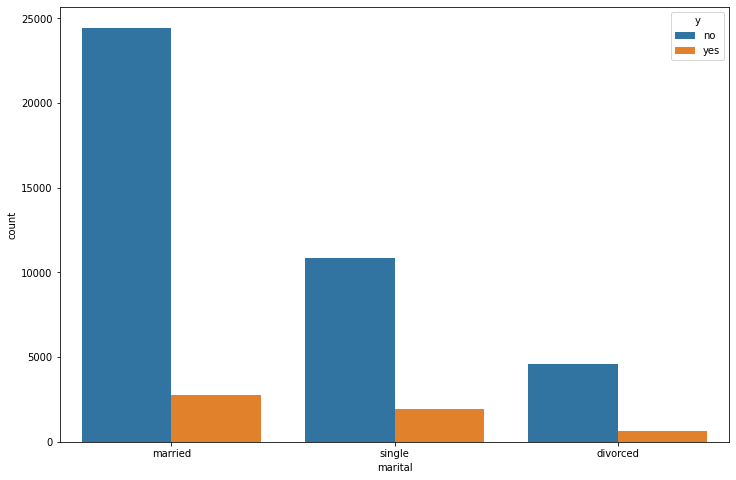

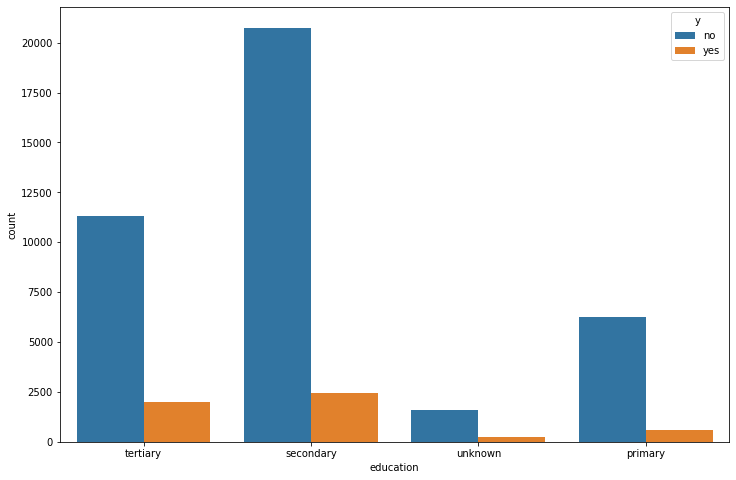

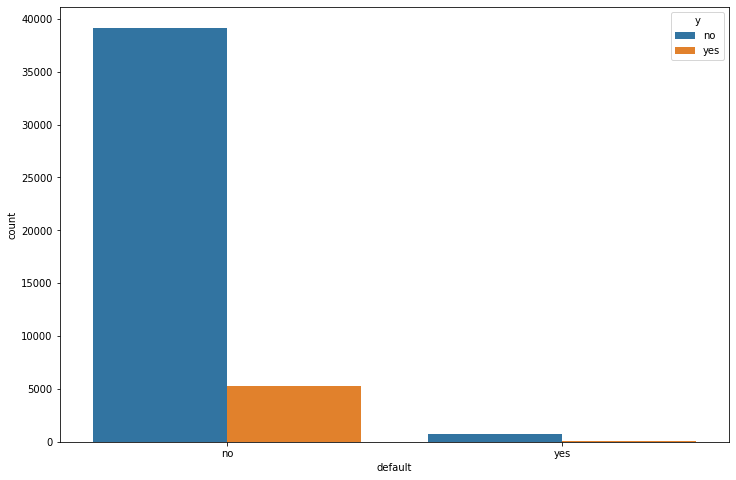

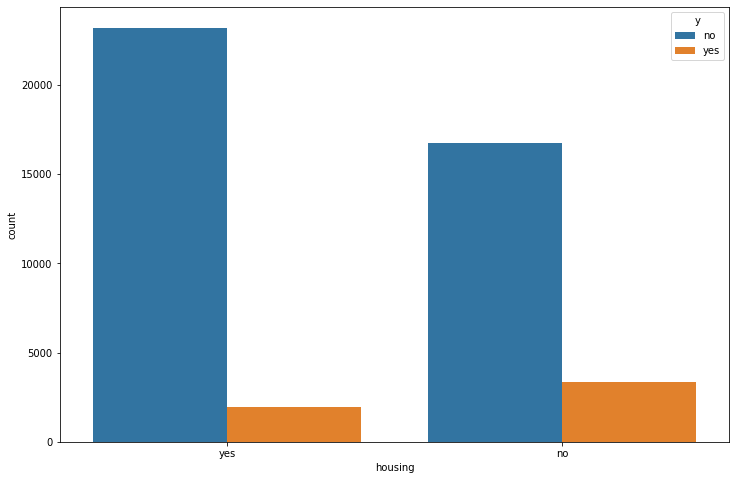

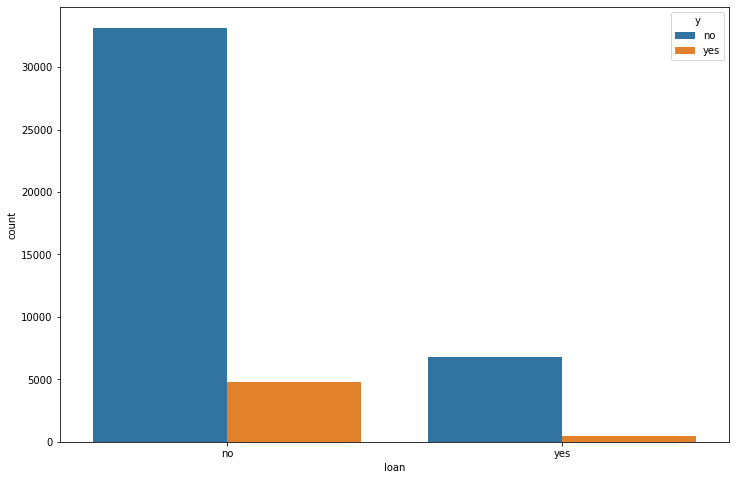

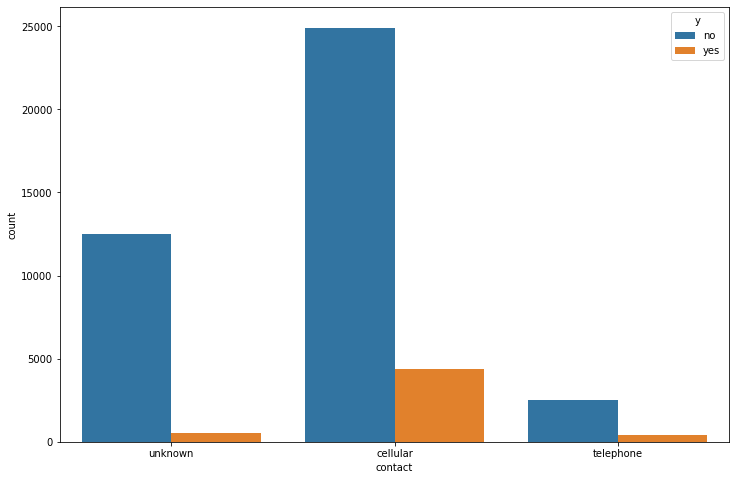

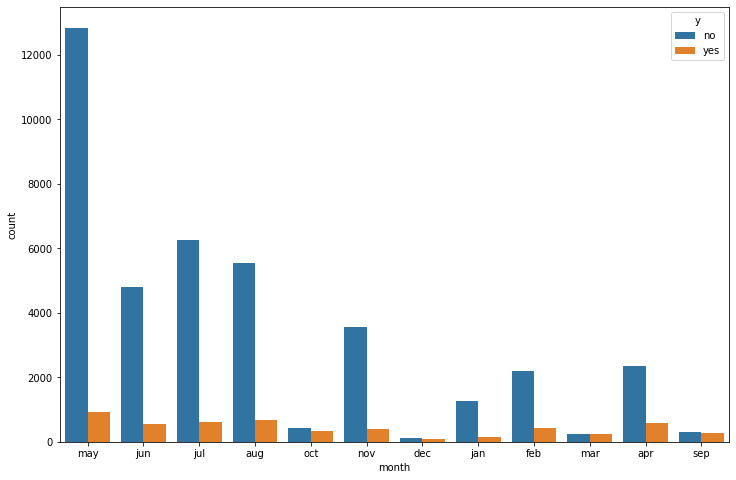

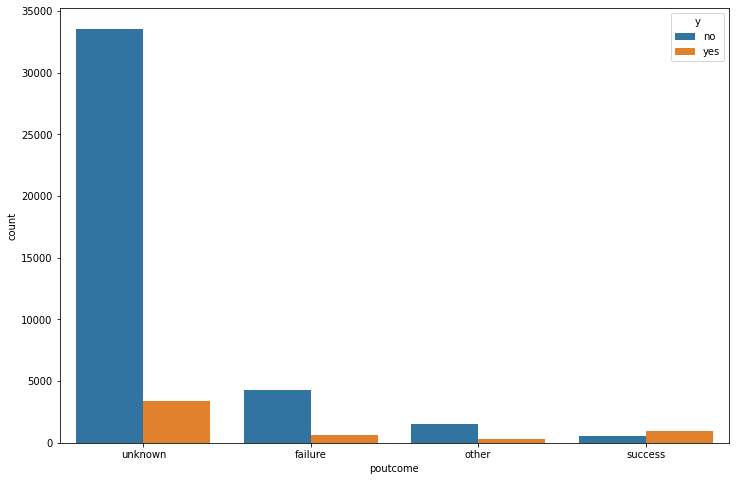

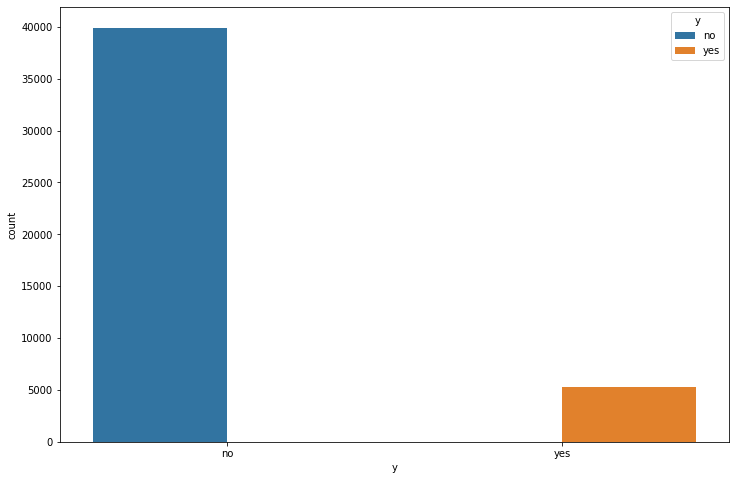

In [ ]:
# Relation of categorical features with the target variable.

for cat in categorical_features:
  plt.figure(figsize=(12,8))
  sns.countplot(cat,hue='y',data=df)
  plt.xlabel(cat)
  plt.xticks()

# **Feature Engineering**

#**one-hot encoding**

In [ ]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [ ]:
bool_columns = ['default', 'housing', 'loan', 'y']
for col in  bool_columns:
    df[col+'_new']=df[col].apply(lambda x : 1 if x == 'yes' else 0)
    df.drop(col, axis=1, inplace=True)

In [ ]:
df.rename(columns = {'y_new':'Subscribe'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

In [ ]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_new,housing_new,loan_new,Subscribe
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.shape

(45211, 43)

# **Checking the balance of the dataset**

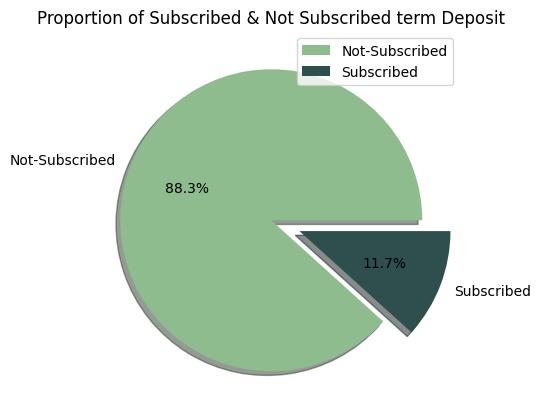

In [ ]:
# Ploting the pie chart to check the balance in the dataset.

plt.figure(figsize=(7,5), dpi=100)
proportion = df['Subscribe'].value_counts()
labels = ['Not-Subscribed','Subscribed']
plt.title('Proportion of Subscribed & Not Subscribed term Deposit')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#8FBC8F','#2F4F4F'])
plt.legend()
plt.show()

In [ ]:
# Checking the count of the classes in the target variable.

df['Subscribe'].groupby(df['Subscribe']).count()

Subscribe
0    39922
1     5289
Name: Subscribe, dtype: int64

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Subscribe'],axis=1)
y = df['Subscribe']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(36168, 42)
(9043, 42)


# **Handling the imbalance in the dataset using SMOTE**

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 0)

In [ ]:
# fit predictor and target variable

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
print ('original dataset length',len(X))
print ('Resample dataset length',len(X_train_sm))

original dataset length 45211
Resample dataset length 63884


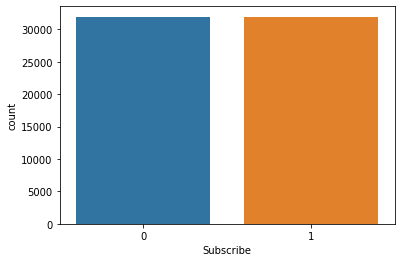

In [ ]:
sns.countplot(y_train_sm)

# **Scaling our dataset**

In [ ]:
# Transforming data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# **Models**

Following models have been used for predictions:-

*   Logistic Regression Classifier
*   Decision Tree Classifier
*   K-Nearest Neighbors(KNN Classifier)
*   Naive Bayes Classifier
*   Support Vector Machine(SVM Classifier)
*   XGB Classifier
*   Random Forest Classifier
*   Neural Networks Classification



# **Logistic Regression Classifier**

In [ ]:
# Importing important library

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [ ]:
# Creating model object for logistic regression.

clf = LogisticRegression(fit_intercept=True, max_iter=10000)

In [ ]:
# fit the model.

clf.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=10000)

In [ ]:
# Getting the predicted classes for training and testing set

train_class_preds = clf.predict(X_train_sm)
test_class_preds = clf.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy = accuracy_score(train_class_preds, y_train_sm)
test_accuracy = accuracy_score(test_class_preds, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)


The accuracy on train data is  0.9299511614801829
The accuracy on test data is  0.8802388587858012


In [ ]:
# Confusion Matrix for logistic regression classifier.

cf_matrix = confusion_matrix(y_test,test_class_preds)
cf_matrix

array([[7795,  185],
       [ 898,  165]])

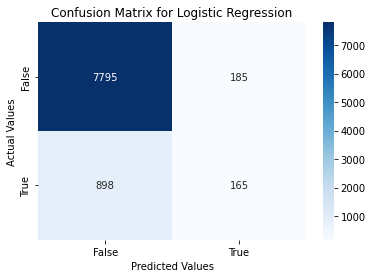

In [ ]:
labels = ['7795','185','898','165']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [ ]:
# Getting classification report.

dict_1 = classification_report(y_test, y_pred_log_reg, output_dict = True)

In [ ]:
# Storing the scores in a dataframe

log_reg_df = pd.DataFrame(dict_1).transpose()
log_reg_df

,precision,recall,f1-score,support
0,0.896698,0.976817,0.935045,7980.000000
1,0.471429,0.155221,0.233546,1063.000000
accuracy,0.880239,0.880239,0.880239,0.880239
macro avg,0.684064,0.566019,0.584295,9043.000000
weighted avg,0.846708,0.880239,0.852584,9043.000000


# **Random Forest Classifier**

In [ ]:
# Importing Necessary library

from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Creating an instance for the random forest regressor.

rf_clf = RandomForestClassifier()

In [ ]:
# Fitting the model

rf_clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [ ]:
# Getting the predicted classes for training and testing set

train_rf_prediction = rf_clf.predict(X_train_sm)
test_rf_prediction = rf_clf.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_rf = accuracy_score(train_rf_prediction, y_train_sm)
test_accuracy_rf = accuracy_score(test_rf_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.8822293486674776


In [ ]:
# Confusion Matrix for random forest classifier.

rf_cf_matrix = confusion_matrix(y_test,test_rf_prediction)
rf_cf_matrix

array([[7977,    3],
       [1062,    1]])

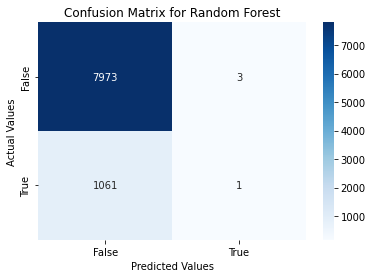

In [ ]:
# Plotting the confusion matrix

labels = ['7973','3','1061','1']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_rf = rf_clf.predict(X_test)

In [ ]:
# Getting classification report.

dict_2 = classification_report(y_test, y_pred_rf, output_dict = True)

In [ ]:
# Storing the scores in a dataframe

rf_df = pd.DataFrame(dict_2).transpose()
rf_df

,precision,recall,f1-score,support
0,0.882509,0.999624,0.937423,7980.000000
1,0.250000,0.000941,0.001874,1063.000000
accuracy,0.882229,0.882229,0.882229,0.882229
macro avg,0.566255,0.500282,0.469649,9043.000000
weighted avg,0.808158,0.882229,0.827450,9043.000000


# **K- nearest Neighbors Classifier**

In [ ]:
# Importing necessary library

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#Creating an instance for the KNN classifier.

KNN_clf = KNeighborsClassifier()

In [ ]:
# Using hyperparameter tuning to get the opimal value of n_neighbors

# params = {'n_neighbors' : [9,11,13,15]}
# cv = RandomizedSearchCV(KNN_clf, random_state = 0, cv = 10, param_distributions = params)

In [ ]:
# Fitting the model

KNN_clf.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

In [ ]:
# Checking the best parameter.

# cv.best_params_

In [ ]:
# Fitting the model with the best parameters.

# neighbors = KNeighborsClassifier(n_neighbors = 9)

# neighbors.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Getting the predicted classes for training and testing set

train_knn_prediction = KNN_clf.predict(X_train_sm)
test_knn_prediction = KNN_clf.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_knn = accuracy_score(train_knn_prediction, y_train_sm)
test_accuracy_knn = accuracy_score(test_knn_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  0.9105409805272056
The accuracy on test data is  0.8824505142098861


In [ ]:
# Confusion Matrix for KNN classifier.

knn_cf_matrix = confusion_matrix(y_test,test_knn_prediction)
knn_cf_matrix

array([[7980,    0],
       [1063,    0]])

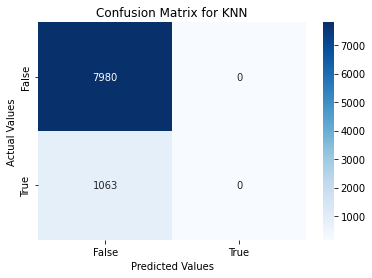

In [ ]:
labels = ['7980','0','1063','0']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for KNN');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Predicted values.

y_pred_KNN = KNN_clf.predict(X_test)

In [ ]:
# Getting classification report.

dict_3 = classification_report(y_test, y_pred_KNN, output_dict = True)

In [ ]:
# Storing the scores in a dataframe

KNN_df = pd.DataFrame(dict_3).transpose()
KNN_df

,precision,recall,f1-score,support
0,0.882451,1.000000,0.937555,7980.000000
1,0.000000,0.000000,0.000000,1063.000000
accuracy,0.882451,0.882451,0.882451,0.882451
macro avg,0.441225,0.500000,0.468778,9043.000000
weighted avg,0.778719,0.882451,0.827346,9043.000000


# **Naive Bayes Classifier**

In [ ]:
# Necessary library

from sklearn.naive_bayes import GaussianNB

In [ ]:
# Creating model object for Naive Bayes Classifier

gnb = GaussianNB()

In [ ]:
# Fitting the model

gnb.fit(X_train_sm, y_train_sm)

GaussianNB()

In [ ]:
# Getting the predicted classes for training and testing set

train_class_preds_gnb = gnb.predict(X_train_sm)
test_class_preds_gnb = gnb.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_gnb = accuracy_score(train_class_preds_gnb, y_train_sm)
test_accuracy_gnb = accuracy_score(test_class_preds_gnb, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_gnb)
print("The accuracy on test data is ", test_accuracy_gnb)

The accuracy on train data is  0.8837737148581805
The accuracy on test data is  0.7936525489328763


In [ ]:
# Confusion Matrix for logistic regression classifier.

cf_matrix_gnb = confusion_matrix(y_test,test_class_preds_gnb)
cf_matrix_gnb

array([[6749, 1231],
       [ 635,  428]])

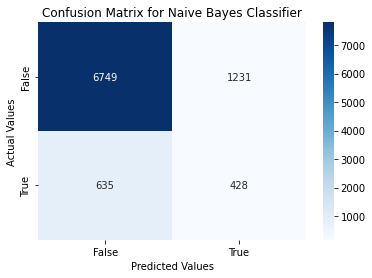

In [ ]:
labels = ['6749','1231','635','428']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()